# Automating Website API Pull Using Python

In [1]:
# Import libraries. 
import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from time import time
from time import sleep
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
# Extract data from coinmarketcap with the help of the api documentation in the webside.

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '331cc14e-2281-40b3-8e94-005c52e46268',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-09-22T23:04:03.881Z', 'error_code': 0, 'error_message': None, 'elapsed': 26, 'credit_count': 1, 'notice': None, 'total_count': 9111}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10476, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [56]:
# Normalize json data pulled from the webside into a dataframe
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19493093.00000,19493093.00000,False,NaN,1,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,26579.70025,10489662737.90564,-21.70190,0.00776,-0.04871,-0.87782,0.54356,-8.85958,-12.95599,518120568788.00031,49.11160,558173705145.09998,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,7426,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120228095.36047,120228095.36047,True,NaN,2,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,1594.47235,3459429521.53369,-33.70970,0.01448,0.50363,-3.46381,-4.81287,-13.69981,-15.02625,191700373866.20712,18.17070,191700373866.20999,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether USDt,USDT,tether,62705,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83191016572.37025,86426198726.43625,True,NaN,3,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,1.00012,16331771730.52112,-75.00430,0.01970,0.01987,0.00794,0.03388,0.01184,-0.03373,83200669623.67325,7.88640,86436227171.39000,NaN,2023-09-22T23:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847560.74585,153847560.74585,False,NaN,4,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,211.27738,276213992.68792,-29.08980,0.07148,0.23438,-1.57474,-2.28429,-11.44460,-10.56555,32504509253.43253,3.08100,32504509253.43000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,0.51405,713817514.79004,-36.78090,0.09637,1.14609,2.25171,-2.71130,-26.91875,5.49761,27370865301.24743,2.59440,51405280854.18000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN
5,3408,USD Coin,USDC,usd-coin,14199,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25758447975.81446,25758447975.81446,False,NaN,6,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,1.00013,2564330010.51905,-14.03820,0.01290,0.02058,0.00343,0.00836,0.00693,0.02090,25761859426.80583,2.44190,25761859426.81000,NaN,2023-09-22T23:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141116636383.70523,141116636383.70523,True,NaN,7,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,0.06155,146167195.98708,-71.72880,0.08895,0.21152,-1.78346,-3.35942,-17.10442,-7.63488,8685027915.45556,0.82320,8685027915.46000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118398843.68900,36183233049.32600,False,NaN,8,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,0.24510,120456320.89397,-51.44310,0.26440,-0.47921,-2.58934,-8.12591,-19.68794,-15.23293,8607585368.71071,0.81590,11029584330.31000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN
8,5426,Solana,SOL,solana,530,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,412612184.25823,558107752.90530,True,NaN,9,NaN,NaN,NaN,2023-09-22T23:02:00.00

In [57]:
# Add timestamp.now() to know when the data is pulled
df['timestamp'] = pd.Timestamp.now()
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19493093.00000,19493093.00000,False,NaN,1,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,26579.70025,10489662737.90564,-21.70190,0.00776,-0.04871,-0.87782,0.54356,-8.85958,-12.95599,518120568788.00031,49.11160,558173705145.09998,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:06.918392
1,1027,Ethereum,ETH,ethereum,7426,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120228095.36047,120228095.36047,True,NaN,2,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,1594.47235,3459429521.53369,-33.70970,0.01448,0.50363,-3.46381,-4.81287,-13.69981,-15.02625,191700373866.20712,18.17070,191700373866.20999,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:06.918392
2,825,Tether USDt,USDT,tether,62705,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83191016572.37025,86426198726.43625,True,NaN,3,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,1.00012,16331771730.52112,-75.00430,0.01970,0.01987,0.00794,0.03388,0.01184,-0.03373,83200669623.67325,7.88640,86436227171.39000,NaN,2023-09-22T23:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-22 17:04:06.918392
3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153847560.74585,153847560.74585,False,NaN,4,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,211.27738,276213992.68792,-29.08980,0.07148,0.23438,-1.57474,-2.28429,-11.44460,-10.56555,32504509253.43253,3.08100,32504509253.43000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:06.918392
4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,0.51405,713817514.79004,-36.78090,0.09637,1.14609,2.25171,-2.71130,-26.91875,5.49761,27370865301.24743,2.59440,51405280854.18000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:06.918392
5,3408,USD Coin,USDC,usd-coin,14199,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25758447975.81446,25758447975.81446,False,NaN,6,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,1.00013,2564330010.51905,-14.03820,0.01290,0.02058,0.00343,0.00836,0.00693,0.02090,25761859426.80583,2.44190,25761859426.81000,NaN,2023-09-22T23:02:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-22 17:04:06.918392
6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,141116636383.70523,141116636383.70523,True,NaN,7,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,0.06155,146167195.98708,-71.72880,0.08895,0.21152,-1.78346,-3.35942,-17.10442,-7.63488,8685027915.45556,0.82320,8685027915.46000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:06.918392
7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35118398843.68900,36183233049.32600,False,NaN,8,NaN,NaN,NaN,2023-09-22T23:02:00.000Z,0.24510,120456320.89397,-51.44310,0.26440,-0.47921,-2.58934,-8.12591,-19.68794,-15.23293,8607585368.71071,0.81590,11029584330.31000,NaN,2023-09-22T23:02:00.000Z,NaN,NaN,

In [58]:
# Create a function to append data calling the api and get the data, then normalize it and set the actual time in the created timestamp column.
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '331cc14e-2281-40b3-8e94-005c52e46268',
        }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)       
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.Timestamp.now()
    df
    
    if not os.path.isfile(r'C:\Users\Gerardo\Documents\Python\Python script api\API_crypto.csv'):
        df.to_csv(r'C:\Users\Gerardo\Documents\Python\Python script api\API_crypto.csv', header = 'column_names')
    else: 
        df.to_csv(r'C:\Users\Gerardo\Documents\Python\Python script api\API_crypto.csv', mode = 'a', header= False)

In [ ]:
# Automate the function with the 333 runs per day allowed by the api documentation.
for i in range(333):
    api_runner()
    print('API runs completed')
    sleep(3600) #sleep for 1 hour
exit()

API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed
API runs completed


In [2]:
# Check the saved dataframe created by the function and updated by the loop
df_csv = pd.read_csv(r'C:\Users\Gerardo\Documents\Python\Python script api\API_crypto.csv')
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_csv


,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10476,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19493093.00000,19493093.00000,False,NaN,1,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,26583.42118,10486206293.62353,-21.69310,-0.00339,-0.04095,-0.92129,0.50616,-8.83147,-12.93807,518193101382.05811,49.11850,558251844846.94995,NaN,2023-09-22T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:32.010141
1,1,1027,Ethereum,ETH,ethereum,7426,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120228095.36047,120228095.36047,True,NaN,2,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,1594.87377,3459466551.23450,-33.71190,0.01792,0.52096,-3.46462,-4.84443,-13.66987,-14.99932,191748635380.64825,18.17530,191748635380.64999,NaN,2023-09-22T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:32.010141
2,2,825,Tether USDt,USDT,tether,62705,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83191016572.37025,86426198726.43625,True,NaN,3,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,1.00041,16332975088.42559,-75.00380,0.04302,0.04577,0.03783,0.04845,0.05987,-0.00044,83225388590.96573,7.88810,86461907424.71001,NaN,2023-09-22T23:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-09-22 17:04:32.010141
3,3,1839,BNB,BNB,bnb,1633,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153847560.74585,153847560.74585,False,NaN,4,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,211.28734,276134785.41504,-29.10850,0.07045,0.23948,-1.58797,-2.27768,-11.44577,-10.57276,32506042171.63776,3.08090,32506042171.64000,NaN,2023-09-22T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:32.010141
4,4,52,XRP,XRP,xrp,1097,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,53245240268.00000,99988414766.00000,False,NaN,5,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,0.51407,713631125.74513,-36.74590,0.09318,1.15113,2.25369,-2.71200,-26.91796,5.50302,27371991481.83388,2.59430,51407395936.35000,NaN,2023-09-22T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:32.010141
5,5,3408,USD Coin,USDC,usd-coin,14199,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25758447975.81446,25758447975.81446,False,NaN,6,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,1.00036,2564444471.52890,-14.02890,0.02660,0.04084,0.02539,0.02972,0.04612,0.05412,25767820039.92513,2.44250,25767820039.93000,NaN,2023-09-22T23:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-09-22 17:04:32.010141
6,6,74,Dogecoin,DOGE,dogecoin,799,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,141116636383.70523,141116636383.70523,True,NaN,7,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,0.06155,146004963.99929,-71.75400,0.08962,0.21818,-1.78666,-3.35084,-17.15068,-7.63385,8685609036.74944,0.82330,8685609036.75000,NaN,2023-09-22T23:03:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-09-22 17:04:32.010141
7,7,2010,Cardano,ADA,cardano,938,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35118398843.68900,36183233049.32600,False,NaN,8,NaN,NaN,NaN,2023-09-22T23:03:00.000Z,0.24510,120394087.66967,-51.44790,0.25597,-0.48213,-2.61915,-8.11425,-19.69091,-15.31412,8607674124.60907,0.81590,11029698060.31000,NaN,2023-

In [3]:
# Transform and clean data exploring on it first
df3 = df_csv.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.00861,-0.06331,0.07515,1.54577,-8.98864,-12.80602
Ethereum,-0.00890,-0.00543,-2.52147,-3.93835,-14.16851,-15.69616
Tether USDt,0.00058,0.00921,-0.02229,0.04570,0.01502,-0.02288
BNB,-0.01594,-0.11627,-1.94598,-3.06631,-11.45307,-11.50005
XRP,-0.02692,-0.17525,2.25412,-1.82622,-27.11304,4.84870
USD Coin,-0.00051,0.00307,-0.01059,0.00657,0.00249,0.00842
Dogecoin,-0.01008,-0.00696,-1.03800,-2.12599,-21.66846,-7.51242
Cardano,0.00027,0.10566,-1.81623,-7.29691,-19.19539,-15.75317
Solana,0.00856,0.02441,2.31713,-7.33171,-17.29234,15.49443


In [4]:
# Make the dataframe useful for creating visualizations
df4 = df3.stack()
df5 = df4.to_frame(name='values')
df5 = df5.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.00861
1,Bitcoin,quote.USD.percent_change_24h,-0.06331
2,Bitcoin,quote.USD.percent_change_7d,0.07515
3,Bitcoin,quote.USD.percent_change_30d,1.54577
4,Bitcoin,quote.USD.percent_change_60d,-8.98864
5,Bitcoin,quote.USD.percent_change_90d,-12.80602
6,Ethereum,quote.USD.percent_change_1h,-0.00890
7,Ethereum,quote.USD.percent_change_24h,-0.00543
8,Ethereum,quote.USD.percent_change_7d,-2.52147
9,Ethereum,quote.USD.percent_change_30d,-3.93835


In [5]:
# Rename df column
df5 = df5.rename(columns={'level_1':'percent_change'})
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])

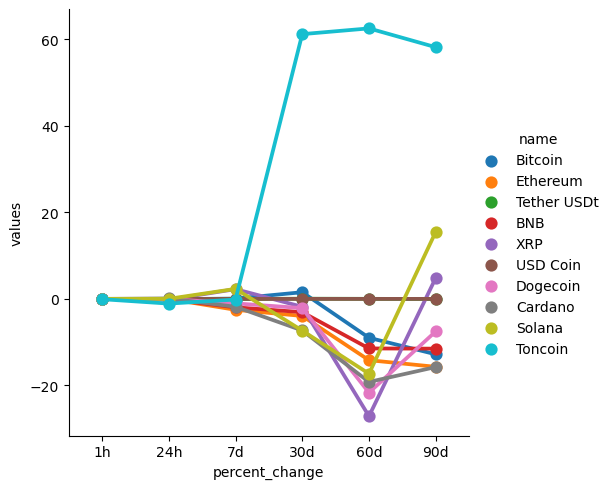

In [6]:
# Create visuals from df5
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind='point')

In [7]:
df_vi1 = df_csv[['name','quote.USD.price','timestamp']]
df_vi1 = df_vi1.query('name == "Bitcoin"')
df_vi1

,name,quote.USD.price,timestamp
0,Bitcoin,26583.42118,2023-09-22 17:04:32.010141
10,Bitcoin,26585.36385,2023-09-22 18:04:32.431046
20,Bitcoin,26603.30190,2023-09-22 19:04:32.871050
30,Bitcoin,26582.38659,2023-09-22 20:04:33.306362
40,Bitcoin,26550.18801,2023-09-22 21:04:33.774501
50,Bitcoin,26531.71576,2023-09-22 22:04:34.340932
60,Bitcoin,26555.98560,2023-09-22 23:04:34.776905
70,Bitcoin,26550.77185,2023-09-23 00:04:35.226821
80,Bitcoin,26577.03175,2023-09-23 01:04:35.766232
90,Bitcoin,26583.43831,2023-09-23 02:04:36.262471


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

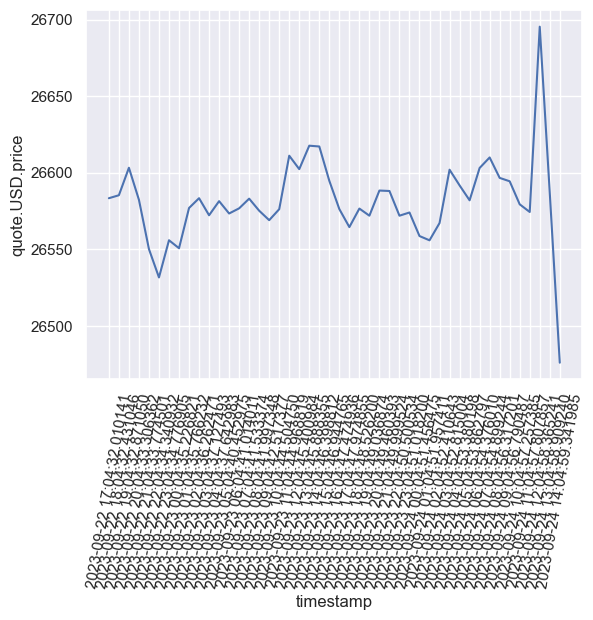

In [8]:
sns.set_theme(style = 'darkgrid')
plt.xticks( rotation= 80 )
sns.lineplot(x='timestamp', y='quote.USD.price', data=df_vi1)

In [51]:
def crypto_40h(crypto):
    df_crypto = df_csv[['name','quote.USD.price','timestamp']]
    df_crypto = df_crypto.loc[df_crypto['name'] == crypto]
    sns.set_theme(style = 'darkgrid')
    plt.rcParams["figure.figsize"] = [10, 4]
    plt.xticks( rotation= 90 )
    plt.xlabel("Day-Hour", labelpad=7)
    return sns.lineplot(x='timestamp', y='quote.USD.price', data=df_crypto)
    

<Axes: xlabel='Day-Hour', ylabel='quote.USD.price'>

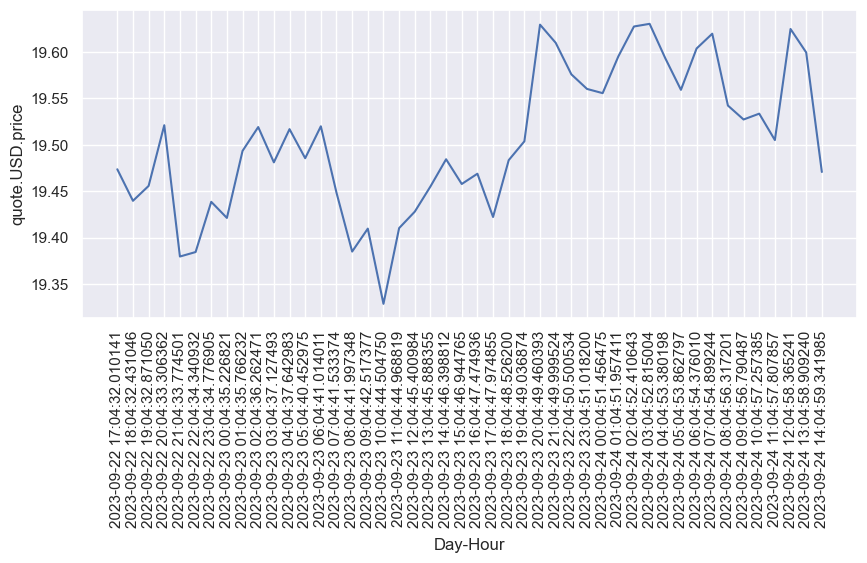

In [54]:
crypto_40h('Solana')